In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
train_df = pd.read_csv('/kaggle/input/forest-cover-type-prediction/train.csv')
test_df = pd.read_csv('/kaggle/input/forest-cover-type-prediction/test.csv')



# **1. EDA & Preprocessing** 


In [26]:
print(train_df.shape)
print(test_df.shape)
print(X.shape, y.shape)
print(X_train.shape, X_test.shape)


(15120, 56)
(565892, 55)
(15120, 54) (15120,)
(12096, 54) (3024, 54)


In [28]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [29]:
# Preprocessing
X = train_df.drop(columns=['Id', 'Cover_Type'])
y = train_df['Cover_Type']


#  2: Separate features and target, then split data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
print(X_train.shape, X_test.shape)


(12096, 54) (3024, 54)


#  3: Standard scaling of features 

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


# **4: Train a basic Random Forest model**.

In [62]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [63]:
# Predict
predictions = model.predict(test_df.drop(columns=['Id']))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [64]:
# Save submission
submission = pd.DataFrame({'Id': test_df['Id'], 'Cover_Type': predictions})
submission.to_csv('/kaggle/working/forest_cover_submission.csv', index=False)


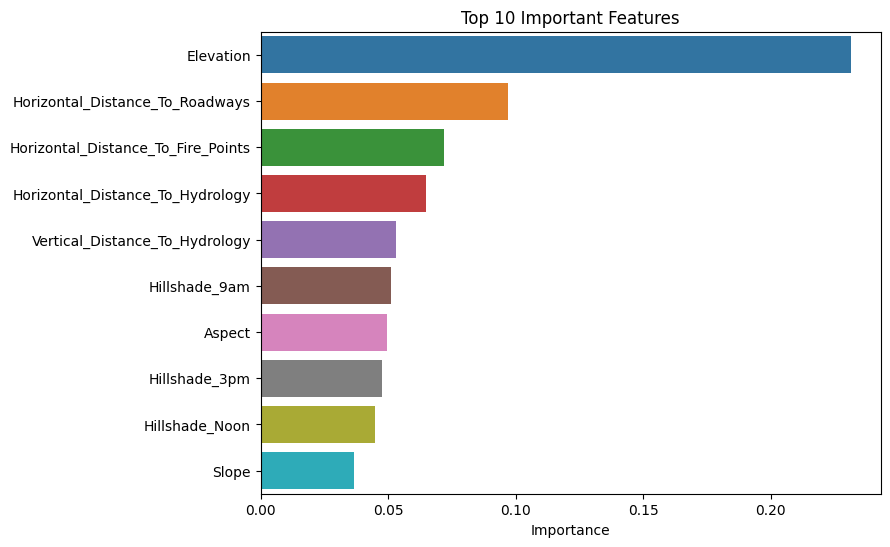

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.show()

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
y_pred = model.predict(X_test)


In [69]:
print(" Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78       421
           2       0.82      0.71      0.76       438
           3       0.83      0.83      0.83       428
           4       0.93      0.98      0.96       449
           5       0.89      0.96      0.92       416
           6       0.87      0.86      0.86       432
           7       0.95      0.97      0.96       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [44]:
cm = confusion_matrix(y_test, y_pred)


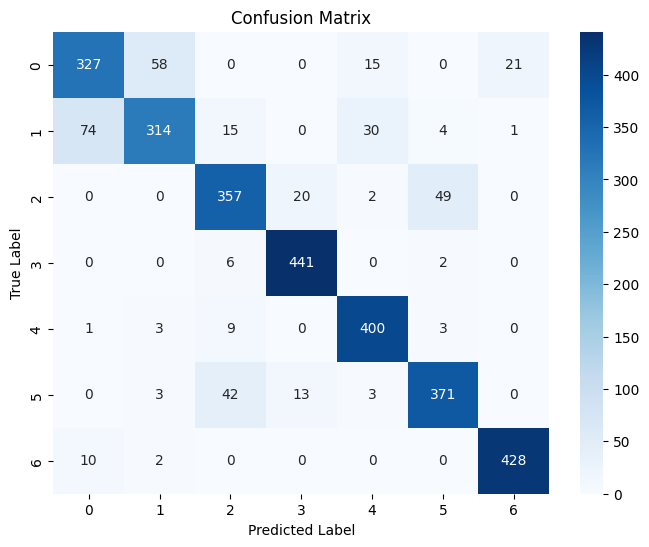

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [47]:
!pip install xgboost


# 5. Model Training: XGBoost

In [52]:
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1  

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=7,  
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train_xgb)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=7, num_parallel_tree=None, ...)

In [56]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_xgb = xgb_model.predict(X_test)

y_pred_xgb += 1

print(" Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


print(" Accuracy:", accuracy_score(y_test, y_pred_xgb))


 Classification Report (XGBoost):
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       421
           2       0.79      0.67      0.73       438
           3       0.84      0.83      0.84       428
           4       0.94      0.98      0.96       449
           5       0.87      0.95      0.91       416
           6       0.85      0.86      0.85       432
           7       0.95      0.97      0.96       440

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024

 Accuracy: 0.8644179894179894


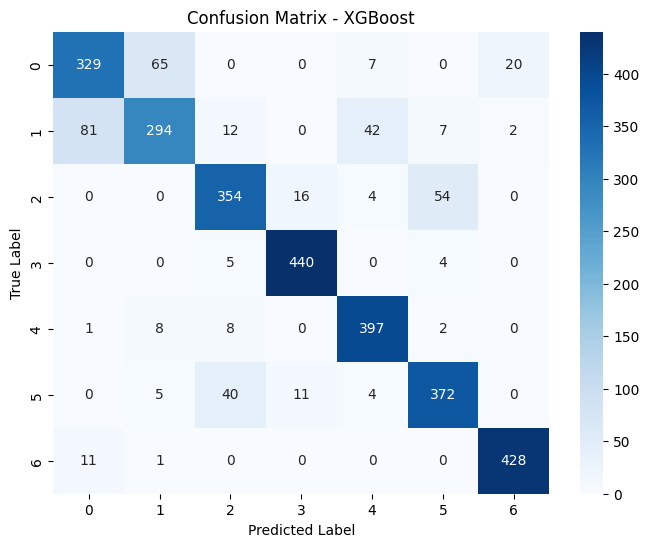

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# 6: Tune XGBoost hyperparameters using RandomizedSearchCV. 

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

y_train_xgb = y_train - 1

xgb_clf = XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss', use_label_encoder=False, random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='accuracy',
    cv=3,  
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train_xgb)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=7, num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [58]:
print("Best Parameters:")
print(random_search.best_params_)


Best Parameters:
{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


In [59]:
from sklearn.metrics import classification_report

best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)
y_pred_best += 1  

print("Classification Report (XGBoost Tuned):")
print(classification_report(y_test, y_pred_best))


Classification Report (XGBoost Tuned):
              precision    recall  f1-score   support

           1       0.79      0.79      0.79       421
           2       0.81      0.70      0.75       438
           3       0.85      0.86      0.85       428
           4       0.95      0.98      0.96       449
           5       0.90      0.95      0.92       416
           6       0.87      0.88      0.87       432
           7       0.95      0.97      0.96       440

    accuracy                           0.88      3024
   macro avg       0.87      0.88      0.87      3024
weighted avg       0.87      0.88      0.87      3024

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   2.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.6; total time=  11.5s
[CV] END colsam

In [75]:
import joblib

joblib.dump(xgb_model, "xgb_model_tuned.pkl")

joblib.dump(model, "random_forest_model.pkl")


['random_forest_model.pkl']